In [302]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data
import cv2

plt.rcParams['figure.figsize'] = (16,12)

In [290]:
image.shape

(50, 50, 3)

In [303]:
image = cv2.resize(data.astronaut(), (150,150))
rows, cols = image.shape[0], image.shape[1]

divisions = 5

In [292]:
src_cols = np.linspace(0, cols, divisions)
src_rows = np.linspace(0, rows, divisions)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

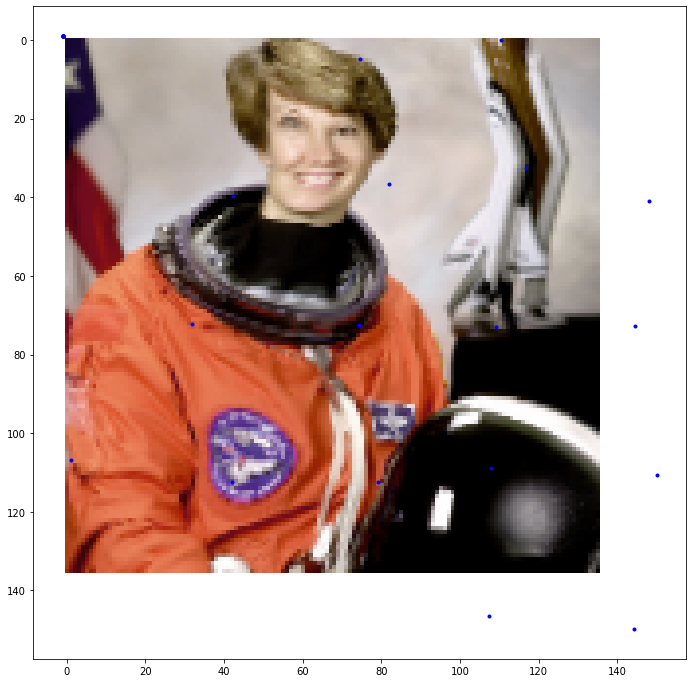

In [298]:
# # add sinusoidal oscillation to row coordinates
# dst_rows = src[:, 1] - np.cos(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
# dst_cols = src[:, 0]
# dst_rows *= 1.5
# dst_rows -= 1.5 * 50
# dst = np.vstack([dst_cols, dst_rows]).T

# # add sinusoidal oscillation to row coordinates
sf = 3
f = max(image.shape) // (2 * (divisions - 1) ) - sf

dst_rows = src[:, 1] + f * np.random.random(src[:, 1].shape) - f/2
dst_cols = src[:, 0] + f * np.random.random(src[:, 0].shape) - f/2

dst = np.vstack([dst_cols, dst_rows]).T

tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

crop_dist = f//2
out = warp(image, tform)[crop_dist:-crop_dist,crop_dist:-crop_dist,:]

fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
# ax.axis((0, out_cols, out_rows, 0))
plt.show()

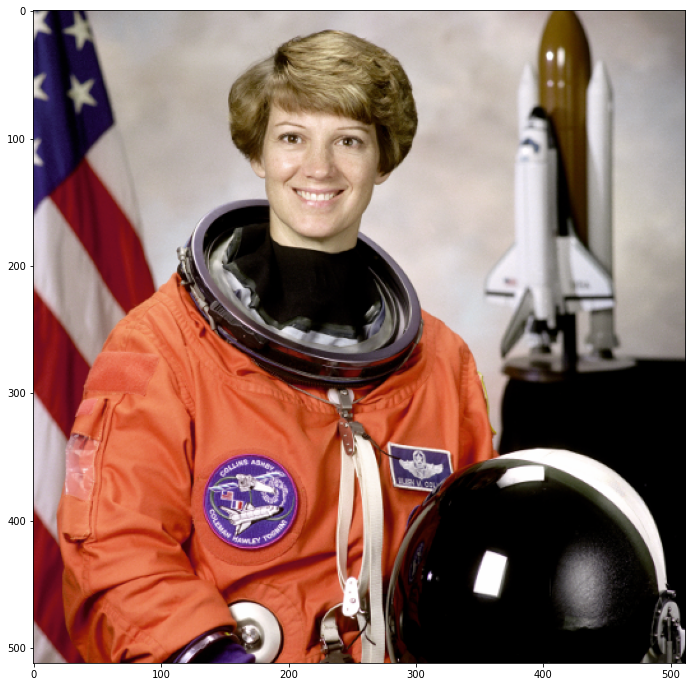

In [299]:
plt.imshow(data.astronaut())

In [286]:
for i in np.random.random((2,2)):
    print(i)

[0.99060115 0.74966348]
[0.39602331 0.31481422]


In [312]:
def warp_sample(x,
                divisions=5,
                sf=1):
    
    # if type(x) == torch.Tensor:
    #     torch_tensor = True
    #     x = x.permute(-1,-2,-3).detach().numpy()
    
    x = 255 * x
    x = x.astype(np.uint8)
    
    rows, cols = x.shape[0], x.shape[1]
    
    src_cols = np.linspace(0, cols, divisions)
    src_rows = np.linspace(0, rows, divisions)
    src_rows, src_cols = np.meshgrid(src_rows, src_cols)
    src = np.dstack([src_cols.flat, src_rows.flat])[0]
    
    f = max(x.shape) // (2 * (divisions - 1) ) - sf

    dst_rows = src[:, 1] + f * np.random.random(src[:, 1].shape) - f/2
    dst_cols = src[:, 0] + f * np.random.random(src[:, 0].shape) - f/2

    dst = np.vstack([dst_cols, dst_rows]).T

    tform = PiecewiseAffineTransform()
    tform.estimate(src, dst)

    crop_dist = 0#f//2
    out = warp(x, tform)#[crop_dist:-crop_dist,crop_dist:-crop_dist,:]
    
    # if torch_tensor:
    #     return torch.Tensor(out).permute(-1,-2,-3).type(torch.float) / 255.0
    
    return out

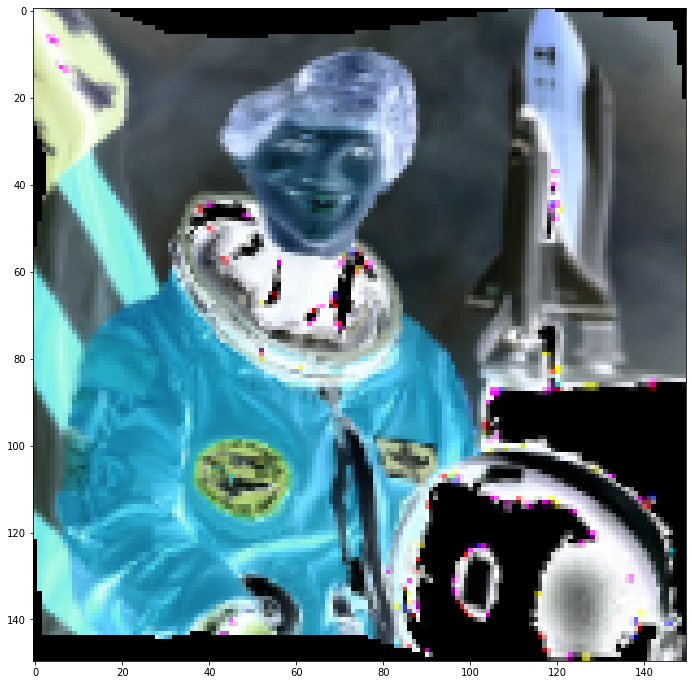

In [328]:
plt.imshow(warp_sample(image))

array([[[124, 118, 124],
        [ 17,   6,  41],
        [ 90,  86,  83],
        ...,
        [160, 147, 140],
        [139, 129, 125],
        [128, 119, 117]],

       [[ 41,  30,  87],
        [ 10,   4,  25],
        [123, 114, 110],
        ...,
        [172, 161, 158],
        [159, 149, 149],
        [134, 126, 123]],

       [[ 45,  36,  95],
        [  2,   0,   6],
        [ 22,   8,  51],
        ...,
        [180, 170, 167],
        [167, 161, 159],
        [137, 131, 129]],

       ...,

       [[107,  11,  27],
        [137,  39,  21],
        [ 71,   5,  13],
        ...,
        [  1,   1,   1],
        [ 11,   9,   8],
        [152, 148, 148]],

       [[139,  65,  69],
        [ 86,   6,  22],
        [140,  23,  12],
        ...,
        [  0,   0,   0],
        [ 59,  54,  54],
        [ 24,  21,  24]],

       [[174, 155, 157],
        [106,  15,  28],
        [167,  54,  11],
        ...,
        [  0,   0,   0],
        [ 32,  30,  22],
        [ 16,  14,  14]]